In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Part I: Exploratory Data Analysis

In [2]:
raw_car = pd.read_csv('car.csv')

In [3]:
raw_car.head(5)

,count,avgPrice,vehicleType,year,power,mileage,brand,transmission,Damage
0,1,10.000,2,1991,238.0,150.000,Asia,automatic,0
1,2,1.750,2,1992,90.0,137.500,Asia,automatic,0
2,1,5.890,2,1993,238.0,150.000,Asia,automatic,0
3,6,4.198,2,1994,164.8,135.000,Asia,automatic,0
4,6,2.707,2,1995,139.0,136.667,Asia,automatic,0


In [4]:
raw_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 9 columns):
count           955 non-null int64
avgPrice        955 non-null float64
vehicleType     955 non-null int64
year            955 non-null int64
power           955 non-null float64
mileage         955 non-null float64
brand           955 non-null object
transmission    955 non-null object
Damage          955 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 67.2+ KB


In [5]:
raw_car.describe()

,count,avgPrice,vehicleType,year,power,mileage,Damage
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,264.257592,12.904051,5.937173,2003.429319,143.895602,116.201730,0.463874
std,684.309054,147.734001,2.776857,7.301674,46.829221,39.759829,0.498955
min,1.000000,0.001000,2.000000,1991.000000,16.000000,5.000000,0.000000
25%,8.000000,1.867500,4.000000,1997.000000,113.250000,103.503000,0.000000
50%,36.000000,4.501000,6.000000,2003.000000,136.000000,135.000000,0.000000
75%,165.500000,10.286000,8.000000,2010.000000,164.900000,143.333000,1.000000
max,6596.000000,4557.694000,10.000000,2018.000000,513.700000,150.000000,1.000000


In [6]:
raw_car.isnull().sum()

count           0
avgPrice        0
vehicleType     0
year            0
power           0
mileage         0
brand           0
transmission    0
Damage          0
dtype: int64

In [ ]:
#year? --> mini6  - Checked
# damage: yes/no
# dependent: continoues
# randomforestClassifier --> mini3

In [17]:
data_type = raw_car.dtypes
data_type

count             int64
avgPrice        float64
vehicleType       int64
year              int64
power           float64
mileage         float64
brand            object
transmission     object
Damage            int64
dtype: object

In [45]:
catcols= list(data_type[data_type == 'object'].index)
catcols.append('vehicleType')
catcols.append('Damage')
catcols

['brand', 'transmission', 'vehicleType', 'Damage']

In [53]:
numcols = list(data_type[data_type =='int64'].index) + list(data_type[data_type =='float64'].index)
numcols.remove('vehicleType')
numcols.remove('Damage')
numcols

['count', 'year', 'avgPrice', 'power', 'mileage']

### Categorical variables plots

In [204]:
## onehotencoding,label encoding, feature skewness, box_cox_transformation--> mini4
## if skew>0.25, transform


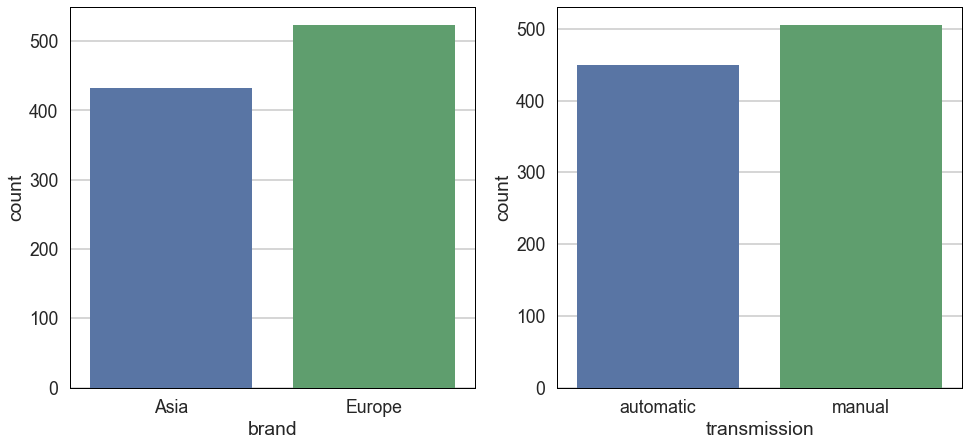

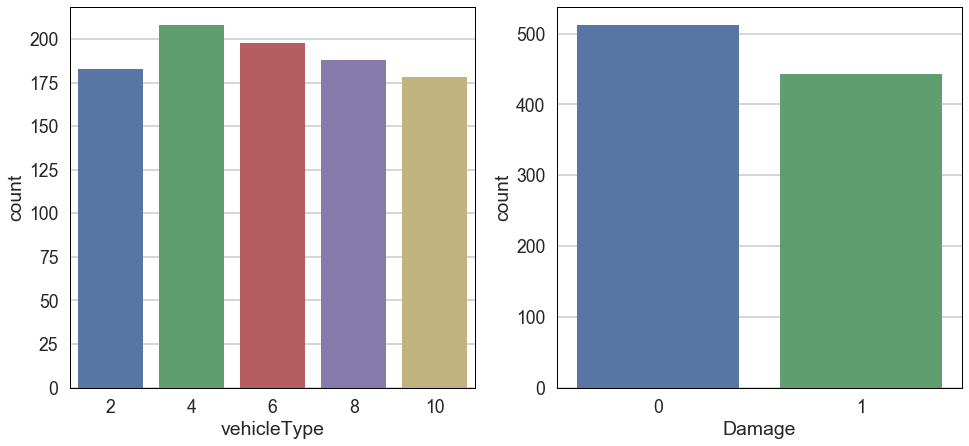

In [205]:
n_rows = 2
n_cols = 2
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16, 7))
    for j in range(n_cols):
        sns.countplot(catcols[i*n_cols+j],data = raw_car, ax=ax[j])    

Observations: 
* Europe has more count than Asia
* Manual car has more count than autometic
* Not much difference for different vihicle types, but type 4 has the most count
* Cars with no un-repaired damages sold better. (double check)

### Numerical Variable plots

IndexError: list index out of range

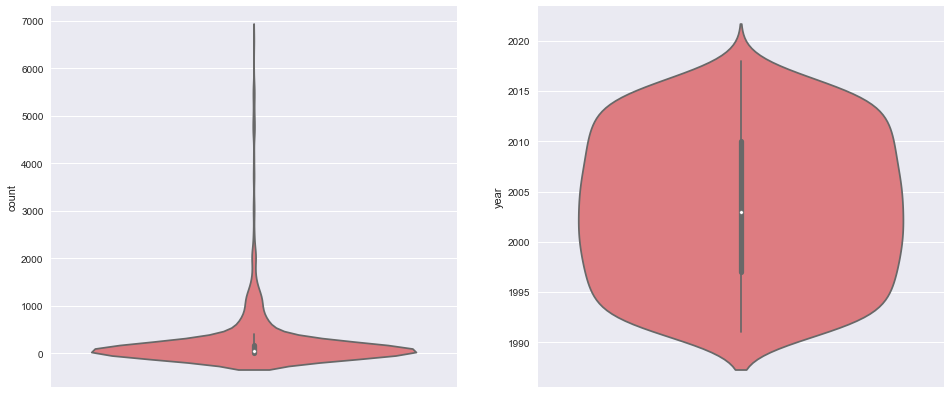

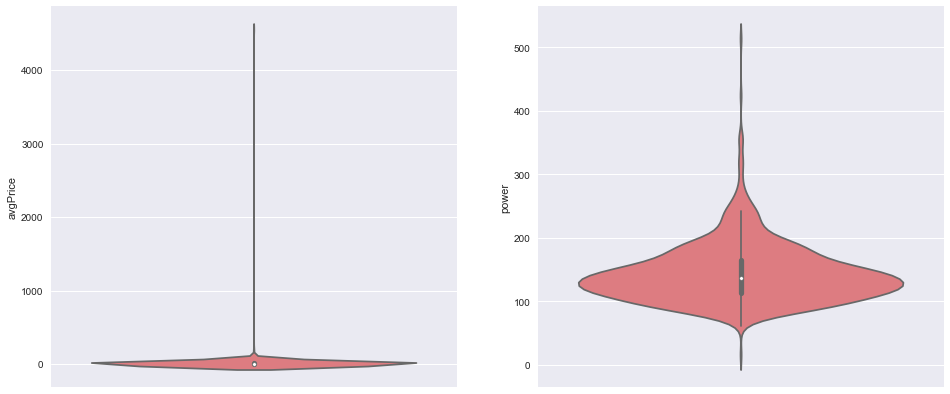

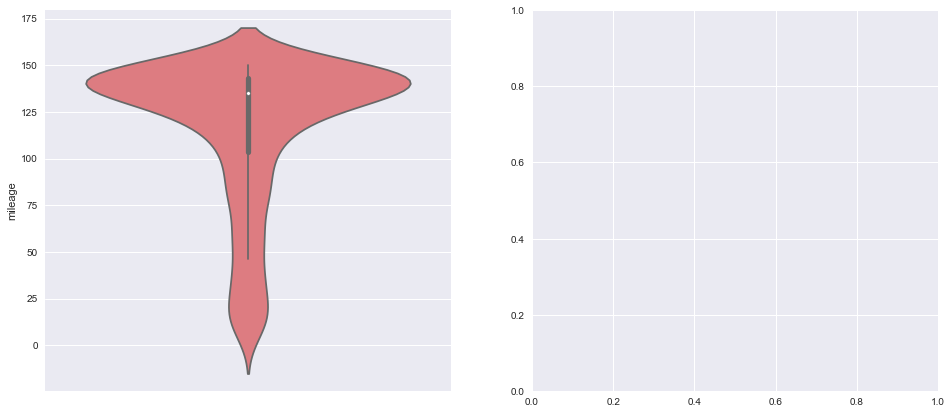

In [83]:
n_rows = 3
n_cols = 2
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(16, 7))
    for j in range(n_cols):
        sns.violinplot(y=numcols[i*n_cols+j],data = raw_car, ax=ax[j],color ='#FD5C64',saturation=0.6) 

Observations: Count, avgPrice, power and mileage are skewed. Need to be normalized.

### An alternative way for the above graphs:

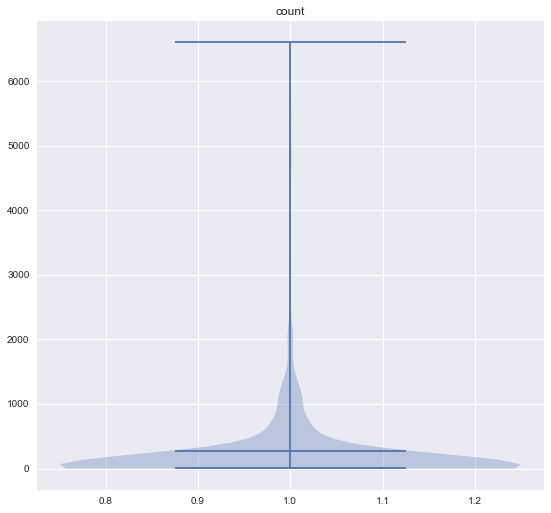

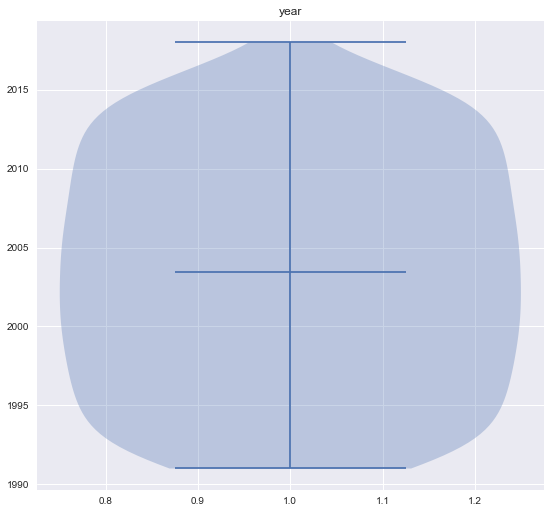

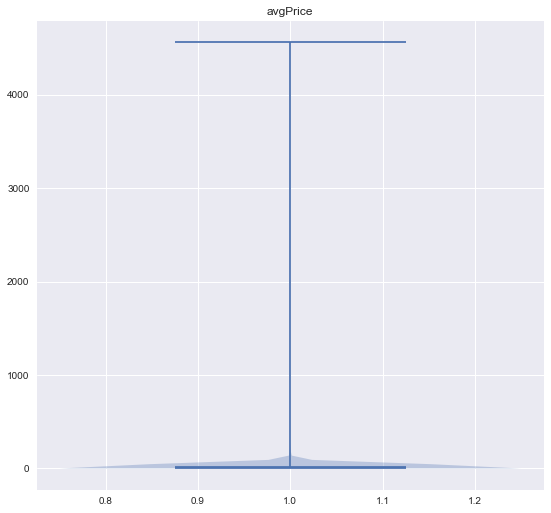

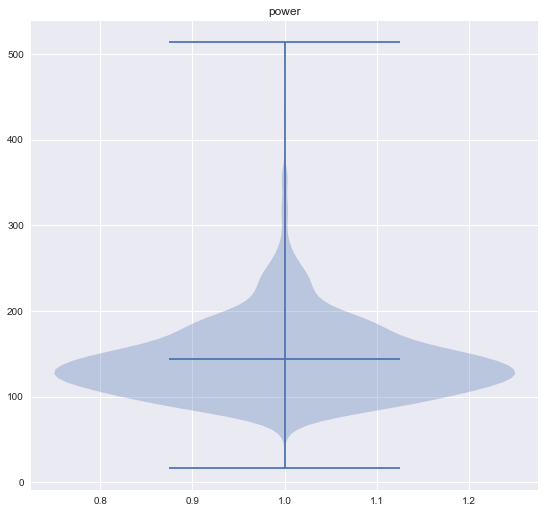

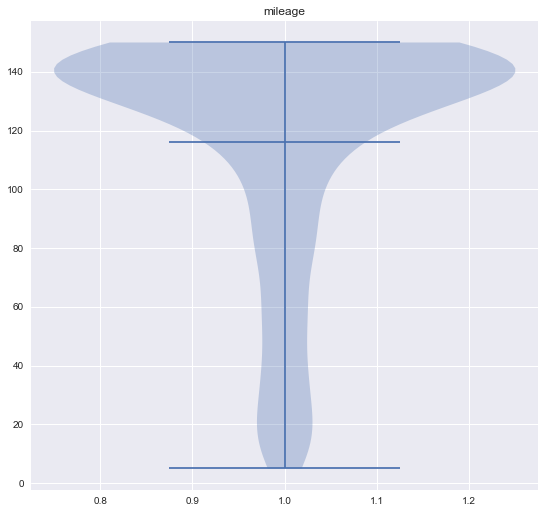

In [97]:
count=1
for i in range(len(numcols)):
    fig = plt.figure(figsize=(20,50))
    plt.subplot(len(numcols),2,count)
    plt.violinplot(raw_car[numcols[i]],showmeans=True)
    plt.title(numcols[i])
    count+=1

### Year

In [112]:
year_count = raw_car.year.value_counts()
year_count

2004    40
2006    40
2001    40
2000    39
2002    39
2003    39
1999    39
2009    38
1998    38
2007    38
2005    38
1997    38
2011    37
2010    37
1996    37
1995    37
2008    37
2012    36
1994    36
2013    35
1991    34
2014    34
2015    33
1993    33
1992    33
2016    22
2017     6
2018     2
Name: year, dtype: int64

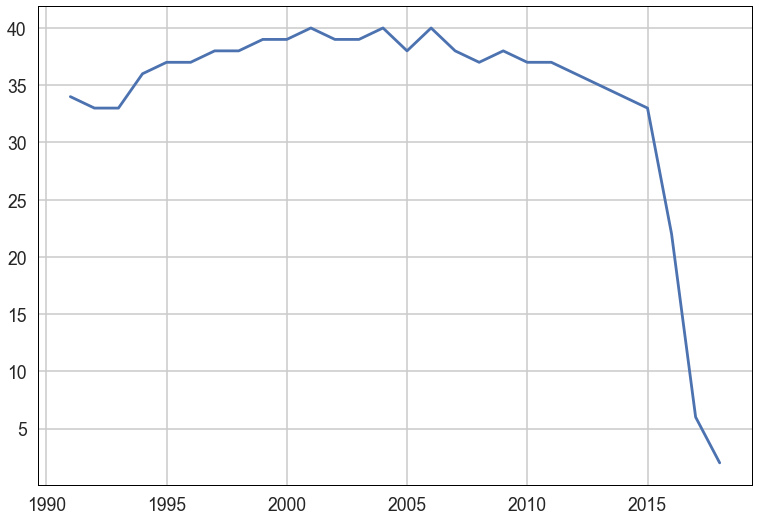

In [114]:
plt.plot(year_count.sort_index())

Observations: 
* After the year of 2015, there's a significant decrease in the number of cars sold. 

### Corrplot

In [116]:
# create a dataframe with only numerical features
df_num = raw_car.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,count,avgPrice,vehicleType,year,power,mileage,Damage
0,1,10.000,2,1991,238.0,150.000,0
1,2,1.750,2,1992,90.0,137.500,0
2,1,5.890,2,1993,238.0,150.000,0
3,6,4.198,2,1994,164.8,135.000,0
4,6,2.707,2,1995,139.0,136.667,0


Check if there's a linear relationship between features

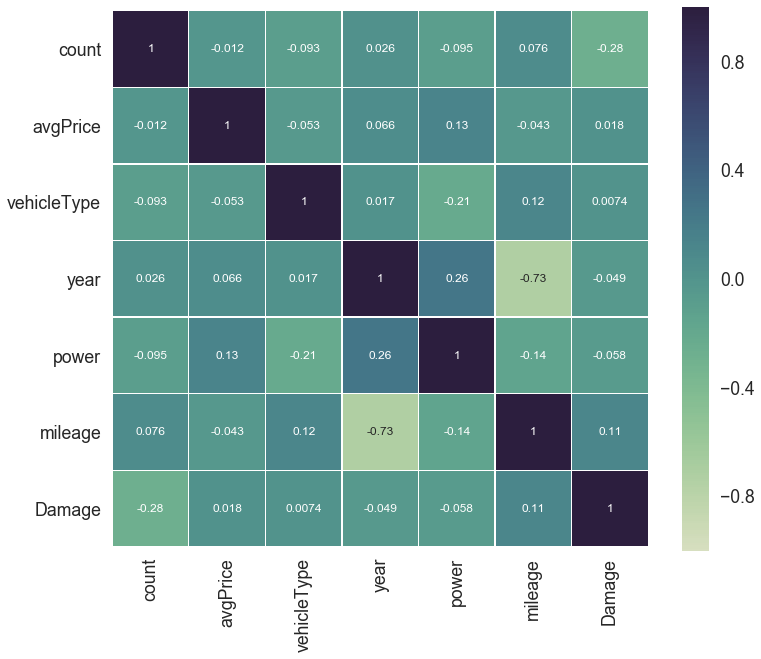

In [136]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))
cmapp = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

sns.heatmap(corr, 
            cmap=cmapp, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True);

### Same plot with different color

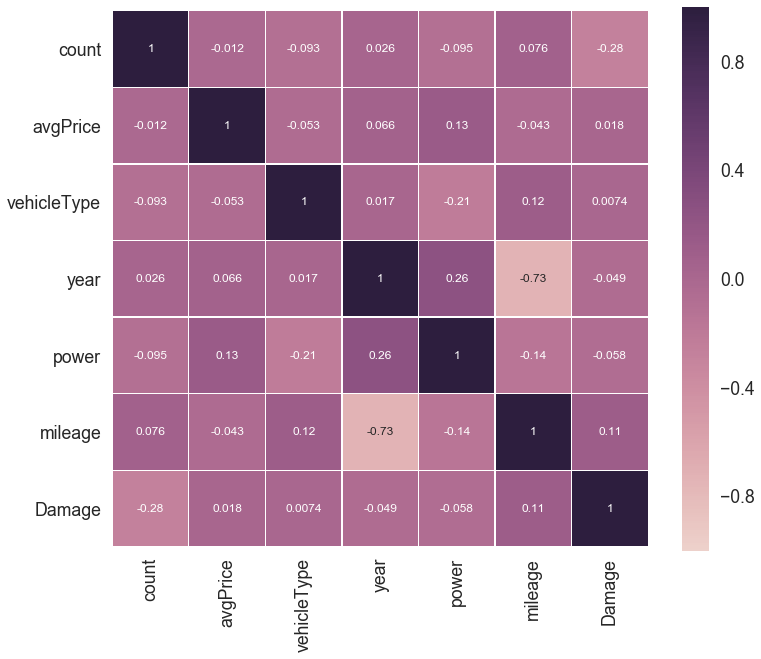

In [155]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))
cmapp = sns.cubehelix_palette(8,as_cmap=True)

sns.heatmap(corr, 
            cmap=cmapp, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 12}, square=True) #mask= corr < 0.95);

#### Corcoef with p-values

In [142]:
from scipy.stats.stats import pearsonr
corrxt = pearsonr(raw_car['year'],raw_car['power'])
corrxt # (corrcoef, p-value) , significant

(0.25658452528663661, 8.0080020147713877e-16)

In [143]:
corrxt = pearsonr(raw_car['power'],raw_car['avgPrice'])
corrxt # significant

(0.13330808553543555, 3.5853826374754274e-05)

In [146]:
corrxt = pearsonr(raw_car['mileage'],raw_car['vehicleType'])
corrxt # significant

(0.12382525253900867, 0.00012488031690472087)

In [147]:
corrxt = pearsonr(raw_car['mileage'],raw_car['Damage'])
corrxt # significant

(0.10961219935881808, 0.00069094694311340292)

In [141]:
corrxt = pearsonr(raw_car['count'],raw_car['mileage'])
corrxt # not significant

(0.076433929413361135, 0.018156724040124972)

In [148]:
corrxt = pearsonr(raw_car['mileage'],raw_car['year'])
corrxt # negatively correlated, significant

(-0.72660956219467177, 1.5879385171073929e-157)

Observations: 
* There is some strong correlations,but usually we set 0.95 as threhold. 
* Thus, none of the features should be removed.

### Response Variable: count

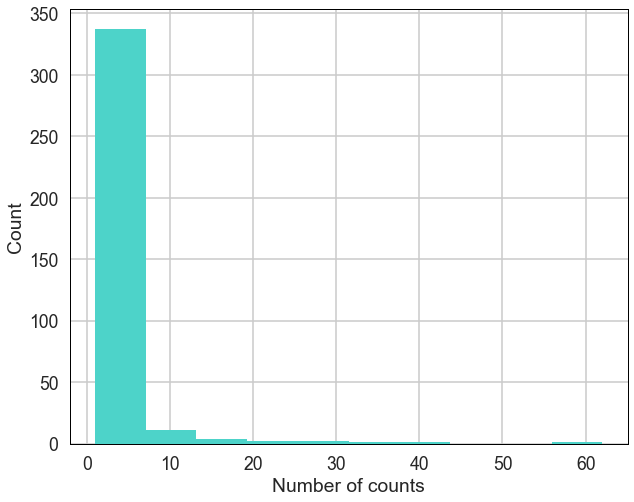

In [185]:
fig = plt.figure(figsize= (10,8))
plt.hist(raw_car['count'].value_counts().sort_index(),color= '#4DD3C9')
plt.xlabel('Number of counts')
plt.ylabel('Count')

# Part II : Modelling

In [235]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics, preprocessing, cross_validation
#from sklearn.preprocessing import StandardScaler

In [222]:
# Create a list(catcol) with categorical features
catcol= list(data_type[data_type == 'object'].index)
catcol

['brand', 'transmission']

In [224]:
## label encoding
import time
LBL = preprocessing.LabelEncoder()
start=time.time()
LE_map=dict()
for cat_col in catcol:
    raw_car[cat_col] = LBL.fit_transform(raw_car[cat_col])
    LE_map[cat_col]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_)))
print ('Label enconding finished in %f seconds' % (time.time()-start))

Label enconding finished in 0.020054 seconds


In [226]:
LE_map

{'brand': {'Asia': 0, 'Europe': 1},
 'transmission': {'automatic': 0, 'manual': 1}}

In [227]:
## one-hot-encoding
OHE = preprocessing.OneHotEncoder(sparse=True)
start=time.time()
car_sparse=OHE.fit_transform(raw_car[catcol])
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))

print (car_sparse.shape)

One-hot-encoding finished in 0.027343 seconds
(955, 4)


In [230]:
raw_car.dtypes

count             int64
avgPrice        float64
vehicleType       int64
year              int64
power           float64
mileage         float64
brand             int64
transmission      int64
Damage            int64
dtype: object

In [232]:
## split train test
Y = raw_car['count']
X = raw_car.drop(['count'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [240]:
## Baseline model : Random forest
RF = RandomForestRegressor() # 对label =1 的给多点weight,因为它们数量很少
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (RF.feature_importances_)
print(RF.predict)

[ 0.1020933   0.08919516  0.15980926  0.34174834  0.05790265  0.10166268
  0.01198794  0.13560068]
<bound method ForestRegressor.predict of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>


In [252]:
# MSE
print (metrics.mean_squared_error(y_pred,y_test))

96560.349267


### Grid Search

In [257]:
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'neg_mean_squared_error',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv) # cv = cv is the # of folds of cross validation 
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [259]:
# n_estimators is the # of dicision tree
param_grid = {'n_estimators':[50,100,150],
             'criterion':['mse', 'mae']}
             

RF = search_model(X.values
            , Y.values
            , RandomForestRegressor()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] criterion=mse, n_estimators=50 ..................................
[CV] criterion=mse, n_estimators=50 ..................................
[CV] criterion=mse, n_estimators=50 ..................................
[CV] criterion=mse, n_estimators=50 ..................................
[CV]  criterion=mse, n_estimators=50, score=-1248261.064911, total=   0.3s
[CV]  criterion=mse, n_estimators=50, score=-200239.870586, total=   0.3s
[CV]  criterion=mse, n_estimators=50, score=-1535105.275966, total=   0.4s
[CV] criterion=mse, n_estimators=50 ..................................
[CV]  criterion=mse, n_estimators=50, score=-13179.124480, total=   0.4s
[CV] criterion=mse, n_estimators=100 .................................
[CV] criterion=mse, n_estimators=100 .................................
[CV] criterion=mse, n_estimators=100 .................................
[CV]  criterion=mse, n_estimators=50, score=-2951629.585650, total=   0.3s


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s


[CV]  criterion=mse, n_estimators=100, score=-2002403.432165, total=   0.7s
[CV]  criterion=mse, n_estimators=100, score=-155767.001481, total=   0.7s
[CV] criterion=mse, n_estimators=100 .................................
[CV] criterion=mse, n_estimators=150 .................................
[CV]  criterion=mse, n_estimators=100, score=-12032.435966, total=   0.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV]  criterion=mse, n_estimators=100, score=-1205199.022106, total=   0.7s
[CV] criterion=mse, n_estimators=150 .................................
[CV]  criterion=mse, n_estimators=100, score=-3188999.299675, total=   0.7s
[CV] criterion=mse, n_estimators=150 .................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.9s


[CV]  criterion=mse, n_estimators=150, score=-1768005.143636, total=   1.0s
[CV] criterion=mse, n_estimators=150 .................................
[CV]  criterion=mse, n_estimators=150, score=-11019.332140, total=   1.1s
[CV] criterion=mae, n_estimators=50 ..................................
[CV]  criterion=mse, n_estimators=150, score=-153891.542393, total=   1.1s
[CV] criterion=mae, n_estimators=50 ..................................
[CV]  criterion=mse, n_estimators=150, score=-1258641.127049, total=   1.2s
[CV] criterion=mae, n_estimators=50 ..................................
[CV]  criterion=mse, n_estimators=150, score=-2755129.048138, total=   1.5s
[CV] criterion=mae, n_estimators=50 ..................................
[CV]  criterion=mae, n_estimators=50, score=-11849.118676, total=   4.5s
[CV] criterion=mae, n_estimators=50 ..................................
[CV]  criterion=mae, n_estimators=50, score=-24432.175518, total=   4.3s
[CV] criterion=mae, n_estimators=100 ..............

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.1s


[CV]  criterion=mae, n_estimators=50, score=-186919.644017, total=   4.2s
[CV] criterion=mae, n_estimators=100 .................................
[CV]  criterion=mae, n_estimators=50, score=-1136248.412760, total=   4.5s
[CV] criterion=mae, n_estimators=100 .................................
[CV]  criterion=mae, n_estimators=50, score=-545120.666501, total=   4.8s
[CV] criterion=mae, n_estimators=100 .................................
[CV]  criterion=mae, n_estimators=100, score=-12349.796951, total=   8.4s
[CV] criterion=mae, n_estimators=100 .................................
[CV]  criterion=mae, n_estimators=100, score=-24748.416674, total=   8.7s
[CV] criterion=mae, n_estimators=150 .................................
[CV]  criterion=mae, n_estimators=100, score=-187101.507784, total=   8.1s
[CV] criterion=mae, n_estimators=150 .................................
[CV]  criterion=mae, n_estimators=100, score=-1173355.469531, total=   8.4s
[CV] criterion=mae, n_estimators=150 ...............

[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:   30.4s remaining:    3.4s


[CV]  criterion=mae, n_estimators=150, score=-187000.747216, total=  12.3s
[CV]  criterion=mae, n_estimators=150, score=-1209228.204308, total=  10.5s
[CV]  criterion=mae, n_estimators=150, score=-598069.595388, total=   7.8s


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.0s finished


In [260]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: -380914.003
Best parameters set: {'criterion': 'mae', 'n_estimators': 50}
Scores: [mean: -1189682.98432, std: 1057389.50104, params: {'criterion': 'mse', 'n_estimators': 50}, mean: -1312880.23828, std: 1186421.19497, params: {'criterion': 'mse', 'n_estimators': 100}, mean: -1189337.23867, std: 1024884.81719, params: {'criterion': 'mse', 'n_estimators': 150}, mean: -380914.00349, std: 423890.52653, params: {'criterion': 'mae', 'n_estimators': 50}, mean: -398778.18859, std: 441141.96000, params: {'criterion': 'mae', 'n_estimators': 100}, mean: -405807.44978, std: 454341.25131, params: {'criterion': 'mae', 'n_estimators': 150}]


/Users/meierhabarexiti/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


### Fit with the best parameter combination

In [271]:
RF_final = RandomForestRegressor(n_estimators= 50,
                                 criterion = 'mae',
                                 ) 
                            
RF_final= RF_final.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [273]:
print (RF_final.feature_importances_)
print(RF_final.predict)

[ 0.13943566  0.10957544  0.20051002  0.28111894  0.11282774  0.06372488
  0.03149272  0.0613146 ]
<bound method ForestRegressor.predict of RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)>


### Feature importance

In [ ]:
labels = ['avgPrice', 'vehicleType', 'year', 'power', 'mileage', 'brand','transmission', 'Damage']

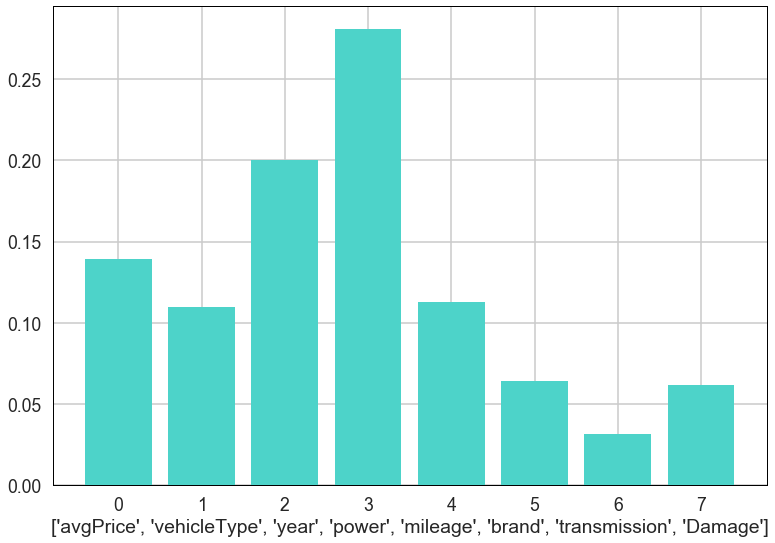

In [288]:
plt.bar(range(len(RF_final.feature_importances_)), RF_final.feature_importances_, color = '#4DD3C9')
plt.xlabel (labels)